<h1>Read data</h1>

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('data/labeledTrainData.tsv', header=0, delimiter='\t', quoting=3) #파일의 첫줄에 열 이름이 있고, \t로 탭이 구분되고, quoting=3는 쌍따옴표를 무시한다.
test  = pd.read_csv('data/testData.tsv', header=0, delimiter='\t', quoting=3)

In [3]:
train.shape

(25000, 3)

In [4]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [5]:
train.tail()

,id,sentiment,review
24995,"""3453_3""",0,"""It seems like more consideration has gone int..."
24996,"""5064_1""",0,"""I don't believe they made this film. Complete..."
24997,"""10905_3""",0,"""Guy is a loser. Can't get girls, needs to bui..."
24998,"""10194_3""",0,"""This 30 minute documentary Buñuel made in the..."
24999,"""8478_8""",1,"""I saw this movie as a child and it broke my h..."


In [6]:
train.columns.values

array(['id', 'sentiment', 'review'], dtype=object)

In [7]:
test.columns.values

array(['id', 'review'], dtype=object)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.0+ KB


In [9]:
train.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [10]:
train['sentiment'].value_counts() # 부정과 긍정이 각각 12500개씩 존재한다

1    12500
0    12500
Name: sentiment, dtype: int64

In [11]:
train['review'][0][:700] #html tag나 특수문자는 정제해야한다

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

<h1>Preprocessing</h1>
- html tag 제거 - BeautifulSoup
- 알파벳 이외의 문자를 공백으로 치환 - 정규표현식
- 불용어 제거 - NLTK
- 어간추출, 음소표기법 -> 어간 추출 - SnowballStemmer

In [12]:
from bs4 import BeautifulSoup

In [13]:
example1 = BeautifulSoup(train['review'][0], 'html5lib') #html tag 제거
print(train['review'][0][:700])
example1.get_text()[:700]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik


'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [14]:
import re

In [15]:
letters_only = re.sub('[^a-zA-Z]', ' ', example1.get_text()) #영어가 아닌건 다 공백으로 변경
letters_only[:700]

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [16]:
lower_case = letters_only.lower() #소문자로 변환

words = lower_case.split() #문자를 토큰화
print(len(words))
words[:10]

437


['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with']

In [17]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')

In [18]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [19]:
words = [w for w in words if not w in stopwords.words('english')] #불용어 제거
print(len(words))
words[:10]

219


['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

<h3>어간 추출</h3>
<h4>: 어형이 변형된 단어로부터 접사 등을 제거하고 그 단어의 어간을 분리해 내는것</h4>
<h4>ex. catlike, catty의 어간으로는 cat이 추출.</h4>
<h4>ex. stemmer, stemming, stemmed의 어간으로는 stem이 추출.</h4>
<h4>ex. fishing, fished, fisher의 어간으로는 fish가  추출.</h4>

- 포터 형태소 분석기는 보수적이고
- 랭커스터 형태소 분석기는 좀 더 적극적이다.
-> 랭커스터 형태소 분석기가 더 많은 동음이의어 형태소를 생성한다

In [20]:
stemmer = nltk.stem.PorterStemmer() #포터 스태머 사용
print(stemmer.stem("maximum"))
print(stemmer.stem("running"))
print(stemmer.stem("runs"))
print(stemmer.stem("run"))

maximum
run
run
run


In [21]:
from nltk.stem.lancaster import LancasterStemmer #랭커스터 스태머 사용 
lancaster_stemmer = LancasterStemmer()
print(lancaster_stemmer.stem("maximum"))
print(lancaster_stemmer.stem("running"))
print(lancaster_stemmer.stem("runs"))
print(lancaster_stemmer.stem("run"))

maxim
run
run
run


In [22]:
words[:10] #처리 전 data

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [23]:
from nltk.stem.snowball import SnowballStemmer

In [24]:
stemmer = SnowballStemmer('english') #스노우볼 스태머 사용
words = [stemmer.stem(w) for w in words]
words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

<h3>음소표기법 - Lemmatization</h3>
<h4>: 단어의 보조 정리 또는 사전 형식에 의해 식별되는 단일 항목으로 분석 될 수 있도록 굴절 된 형태의 단어를 그룹화하는 과정</h4>
- 배가 부르다
- 배를 타러간다
- 이렇게 다른 의미를 갖는것을 앞뒤 문맥을 보고 단어의 의미를 식별하는것. | 적합한 의미를 갖도록 추출하는것

In [25]:
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')

In [26]:
wordnet_lemmatizer = WordNetLemmatizer()

In [27]:
print(wordnet_lemmatizer.lemmatize('fly'))
print(wordnet_lemmatizer.lemmatize('flies'))

fly
fly


In [28]:
words = [wordnet_lemmatizer.lemmatize(w) for w in words]
words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

<h3>지금까지한건 처음 리뷰에 대해서 진행한것. 모든 리뷰에 적용하기 위해 함수화하면</h3>

In [29]:
def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_words = [w for w in words if not w in stops]
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    return(' '.join(stemming_words))

In [30]:
clean_review = review_to_words(train['review'][0])
clean_review

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [31]:
%time train['review_clean'] = train['review'].apply(review_to_words)

Wall time: 59.4 s


In [32]:
%time test['review_clean'] = test['review'].apply(review_to_words)

Wall time: 58.3 s


In [33]:
from multiprocessing import Pool
import numpy as np

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    workers = kwargs.pop('workers')
    pool = Pool(processes = workers)
    result = pool.map(_apply_df, [(d, func, kwargs) for d in np.array_split(df, workers)])
    pool.close()
    return pd.concat(list(result))

In [34]:
# %time clean_train_reviews = apply_by_multiprocessing(train['review'], review_to_words, workers = 4)

In [35]:
# %time clean_test_reviews = apply_by_multiprocessing(test['review'], review_to_words, workers = 4)

In [38]:
#단어 수
train['num_words'] = train['review_clean'].apply(lambda x :len(str(x).split()))
#중복을 제거한 단어 수
train['num_uniq_words'] = train['review_clean'].apply(lambda x :len(set(str(x).split())))

In [39]:
#첫 번째 리뷰에
x = train['review_clean'][0]
x = str(x).split()
print(len(x))
x[:10]

219


['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [54]:
#한글 폰트 깨지는거 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

리뷰별 단어 평균 값:  119.52356
리뷰별 단어 중간 값:  89.0
리뷰별 고유 단어 평균 값:  94.05756
리뷰별 고유 단어 중간 값:  74.0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'리뷰별 고유한 단어 수 분포')

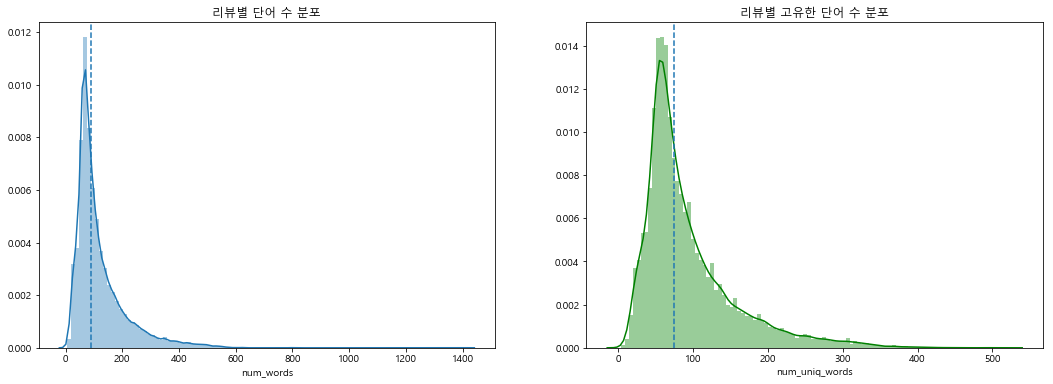

In [55]:
fig, axes = plt.subplots(ncols = 2)
fig.set_size_inches(18, 6)
print('리뷰별 단어 평균 값: ', train['num_words'].mean())
print('리뷰별 단어 중간 값: ', train['num_words'].median())
sns.distplot(train['num_words'], bins=100, ax=axes[0])
axes[0].axvline(train['num_words'].median(), linestyle='dashed')
axes[0].set_title('리뷰별 단어 수 분포')

print('리뷰별 고유 단어 평균 값: ', train['num_uniq_words'].mean())
print('리뷰별 고유 단어 중간 값: ', train['num_uniq_words'].median())
sns.distplot(train['num_uniq_words'], bins=100, color = 'g', ax=axes[1])
axes[1].axvline(train['num_uniq_words'].median(), linestyle='dashed')
axes[1].set_title("리뷰별 고유한 단어 수 분포")

<h1>사이킷런 - CountVectorizer로 피처 생성</h1>
 - 정규표현식을 사용해 토큰을 추출
 - 모두 소문자로 변환시켜서... 대소문자가 달라도 모두 같은 특성
 - 의미없는 특성이 많아서 최소 n개의 문서에 나타난 토큰만을 사용 (min_df)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(analyzer = 'word',
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = None,
                            min_df = 2,
                            ngram_range=(1,3),
                            max_features = 20000)
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=2,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [59]:
pipeline = Pipeline([('vect', vectorizer),])

In [60]:
%time train_data_features = pipeline.fit_transform(train['review_clean'])
train_data_features

Wall time: 28.8 s


<25000x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 2762268 stored elements in Compressed Sparse Row format>

In [61]:
train_data_features.shape

(25000, 20000)

In [63]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

20000


['aag',
 'aaron',
 'ab',
 'abandon',
 'abbey',
 'abbi',
 'abbot',
 'abbott',
 'abc',
 'abduct']

In [64]:
import numpy as np
dist = np.sum(train_data_features, axis=0)

for tag, count in zip(vocab, dist):
    print(count, tag)
    
pd.DataFrame(dist, columns = vocab)

[[26 48 22 ..., 59 40 23]] aag


,aag,aaron,ab,abandon,abbey,abbi,abbot,abbott,abc,abduct,...,zombi bloodbath,zombi film,zombi flick,zombi movi,zone,zoo,zoom,zorro,zu,zucker
0,26,48,22,288,24,30,29,30,125,55,...,23,52,37,89,161,31,71,59,40,23


In [65]:
pd.DataFrame(train_data_features[:10].toarray(), columns=vocab).head()

,aag,aaron,ab,abandon,abbey,abbi,abbot,abbott,abc,abduct,...,zombi bloodbath,zombi film,zombi flick,zombi movi,zone,zoo,zoom,zorro,zu,zucker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h1>Modeling: Random Forest</h1>

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
#n_estimators : 일반적으로 숫자가 클수록 좋은 성능
#n_jobs : 현재 컴퓨터 CPU의 모든 core를 사용할때 -1
#random_state : random값인데...랜포를 여러번 돌릴때마다 항상 다른 스코어가 나오는데. 이것을 일치시키기 위해서 지정
forest = RandomForestClassifier(n_estimators = 2000, n_jobs = -1, random_state = 2018)
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

In [79]:
%time forest = forest.fit(train_data_features, train['sentiment'])

Wall time: 2min 23s


In [80]:
from sklearn.model_selection import cross_val_score
#roc curve를 이용하여 정확도 측정, cross valudation
%time score = np.mean(cross_val_score(forest, train_data_features, train['sentiment'], cv=10, scoring='roc_auc'))

Wall time: 20min 39s


In [81]:
# test data도 백터화 해준다.
%time test_data_features = pipeline.transform(test['review_clean'])
test_data_features = test_data_features.toarray()

Wall time: 6.91 s


In [82]:
# test data를 넣고 예측
result = forest.predict(test_data_features)
result[:10]

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [83]:
#예측 결과를 저장
output = pd.DataFrame(data = {'id':test['id'], 'sentiment':result})
output.head()

,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",1
3,"""7186_2""",1
4,"""12128_7""",1


In [84]:
output.to_csv("data/tutorial_1_BOW_{0:.5f}.csv".format(score), index = False, quoting=3)

In [85]:
output_sentiment = output['sentiment'].value_counts()
print(output_sentiment[0] - output_sentiment[1])
output_sentiment

-286


1    12643
0    12357
Name: sentiment, dtype: int64

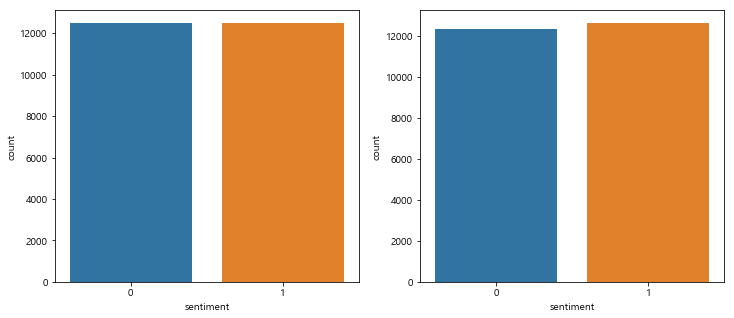

In [86]:
fig, axes = plt.subplots(ncols = 2)
fig.set_size_inches(12,5)
sns.countplot(train['sentiment'], ax=axes[0])
sns.countplot(output['sentiment'], ax=axes[1])